In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

In [2]:
car = pd.read_csv('hybrid_vehicle_price_data.csv')
car.head(100)

,carid,vehicle,year,msrp,accelrate,mpg,mpgmpge,carclass,carclass_id
0,1,Prius (1st Gen),1997,24509.74,7.46,41.26,41.26,C,1
1,2,Tino,2000,35354.97,8.20,54.10,54.10,C,1
2,3,Prius (2nd Gen),2000,26832.25,7.97,45.23,45.23,C,1
3,4,Insight,2000,18936.41,9.52,53.00,53.00,TS,7
4,5,Civic (1st Gen),2001,25833.38,7.04,47.04,47.04,C,1
...,...,...,...,...,...,...,...,...,...
95,96,ActiveHybrid 7i,2011,102605.66,18.18,20.00,20.00,M,3
96,97,Prius C,2012,19006.62,9.35,50.00,50.00,C,1
97,98,Prius PHV,2012,32095.61,8.82,50.00,95.00,M,3
98,99,Ampera,2012,31739.55,11.11,37.00,98.00,C,1


After importing the inital dataset, I would like to do some exploratory data analysis to understand what I am working with, thus some simple check around amount of null values, data type, mean, count of rows and histogram. This is to weed out any outlier and test case that I might need to be aware of when cleaning up data. 

In [3]:
car.isnull().sum()

carid          0
vehicle        0
year           0
msrp           0
accelrate      0
mpg            0
mpgmpge        0
carclass       0
carclass_id    0
dtype: int64

In [6]:
car.describe()

,carid,year,msrp,accelrate,mpg,mpgmpge,carclass_id
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.117647,2009.718954,39319.434706,11.958497,34.797451,38.453268,3.607843
std,44.492599,3.459270,21421.126089,2.940225,10.972522,18.363146,1.964271
min,1.000000,1997.000000,11849.430000,6.290000,17.000000,17.000000,1.000000
25%,39.000000,2008.000000,24995.000000,9.520000,26.000000,26.000000,2.000000
50%,77.000000,2011.000000,31950.000000,11.630000,33.000000,33.640000,3.000000
75%,115.000000,2013.000000,49650.000000,13.470000,41.260000,43.000000,6.000000
max,154.000000,2013.000000,118543.600000,20.410000,72.920000,100.000000,7.000000


In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   carid        153 non-null    int64  
 1   vehicle      153 non-null    object 
 2   year         153 non-null    int64  
 3   msrp         153 non-null    float64
 4   accelrate    153 non-null    float64
 5   mpg          153 non-null    float64
 6   mpgmpge      153 non-null    float64
 7   carclass     153 non-null    object 
 8   carclass_id  153 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 10.9+ KB


In [8]:
len(car)

153

Dropping car id since it's just a column to index each row and carclassid since it's a dupe of carclass.

In [10]:
car = car[[
     #  'carid','carclass_id'
    'msrp','vehicle','year','accelrate','mpg','mpgmpge','carclass']]

car.head()

,msrp,vehicle,year,accelrate,mpg,mpgmpge,carclass
0,24509.74,Prius (1st Gen),1997,7.46,41.26,41.26,C
1,35354.97,Tino,2000,8.20,54.10,54.10,C
2,26832.25,Prius (2nd Gen),2000,7.97,45.23,45.23,C
3,18936.41,Insight,2000,9.52,53.00,53.00,TS
4,25833.38,Civic (1st Gen),2001,7.04,47.04,47.04,C


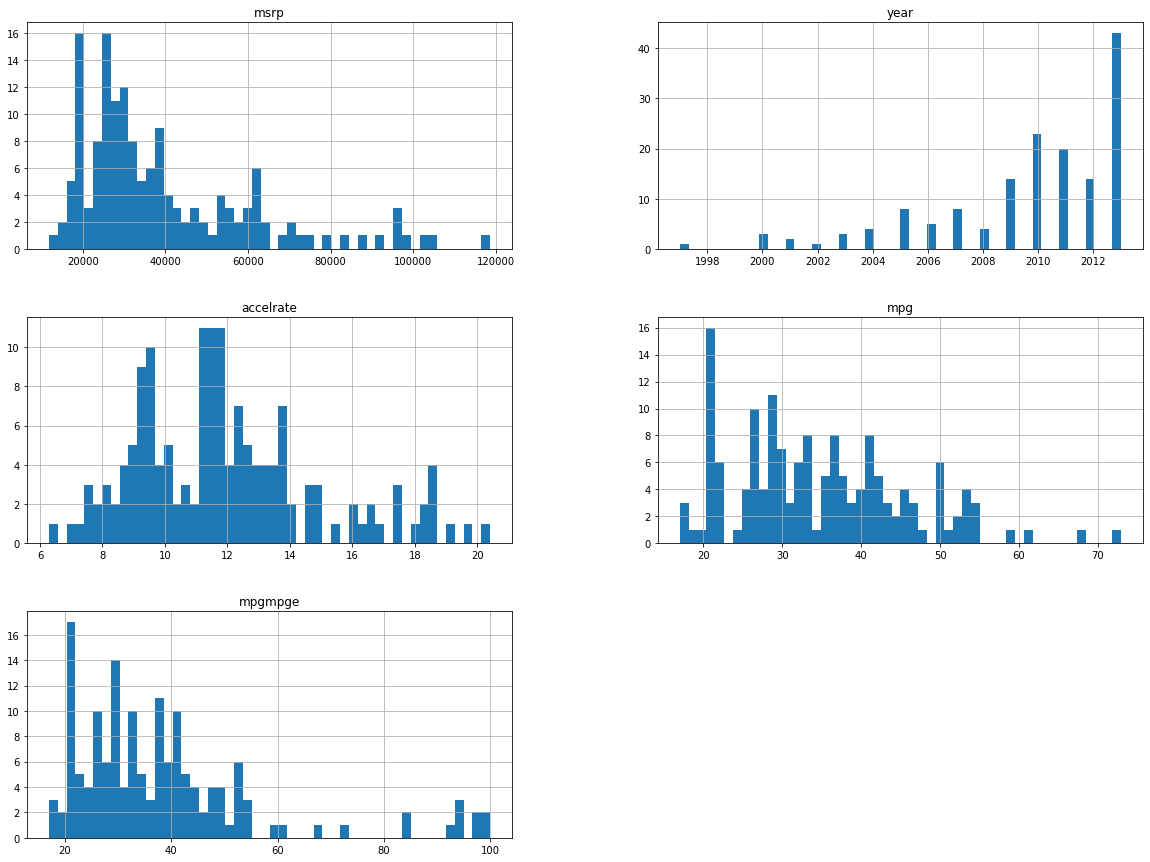

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

car.hist(bins=50, figsize=(20,15))

plt.show()

To get a deeper understanding of the relationship between the dependent and independent variable (MSRP), I would like to see some plots between each relations to get a general understanding of the nature of the data. 

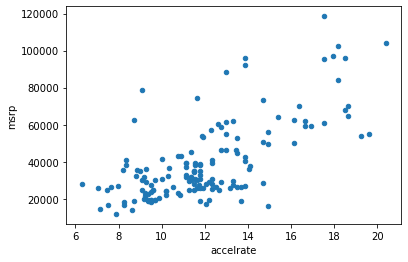

In [12]:
car.plot(kind="scatter", x="accelrate", y ="msrp")
plt.show()

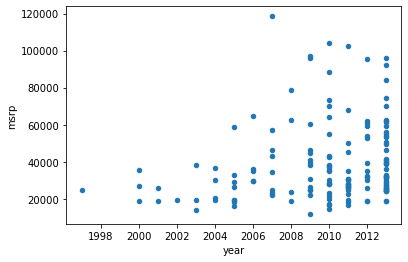

In [13]:
car.plot(kind="scatter", x="year", y ="msrp")
plt.show()

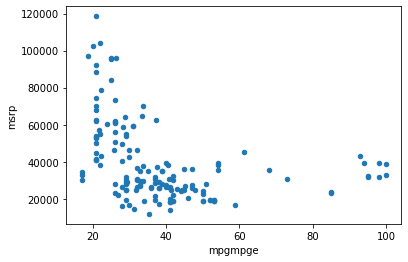

In [15]:
car.plot(kind="scatter", x="mpgmpge", y ="msrp")
plt.show()

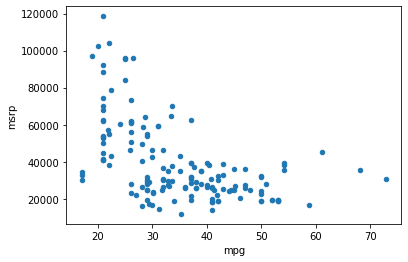

In [16]:
car.plot(kind="scatter", x="mpg", y ="msrp")
plt.show()

In [17]:
corr_matrix = car.corr()
corr_matrix["msrp"].sort_values(ascending=False)

msrp         1.000000
accelrate    0.695578
year         0.209786
mpgmpge     -0.372219
mpg         -0.531826
Name: msrp, dtype: float64

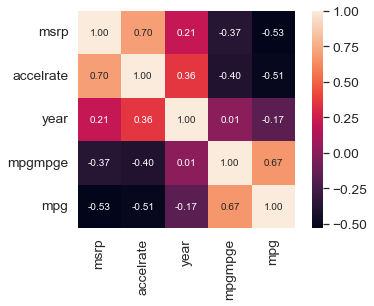

In [18]:
import seaborn as sns
k = 8 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'msrp')['msrp'].index
cm = np.corrcoef(car[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

To prepare the data, we need to split the data into X and Y variables, thus I created two dataframe and created dummy variables for the categorical values that will be utilized in model.

In [79]:
X = car[[
       #  'carid','vehicle','carclass_id','mpgmpge','year',
         'carclass',
         'accelrate','mpg']]
Y = car[['msrp']]
n = pd.get_dummies(car.carclass)
X = pd.concat([X, n], axis=1)

drops = ['carclass']
X.drop(drops, inplace=True, axis=1)
X.head()

,accelrate,mpg,C,L,M,MV,PT,SUV,TS
0,7.46,41.26,1,0,0,0,0,0,0
1,8.20,54.10,1,0,0,0,0,0,0
2,7.97,45.23,1,0,0,0,0,0,0
3,9.52,53.00,0,0,0,0,0,0,1
4,7.04,47.04,1,0,0,0,0,0,0


In [36]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   msrp   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     31.38
Date:                Fri, 03 Mar 2023   Prob (F-statistic):           4.96e-28
Time:                        12:21:14   Log-Likelihood:                -1665.1
No. Observations:                 153   AIC:                             3348.
Df Residuals:                     144   BIC:                             3376.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.171e+04   8037.863      1.457      0.147   -4173.842    2.76e+04
accelrate   3732.9473    480.219      7.773      0.000    2783.758    4682.137
mpg         -437.6355    155.477     -2.815      0.006    -744.948    -130.323
C          -1475.9631   3136.660     -0.471      0.639   -7675.808    4723.882
L           2.532e+04   5086.013      4.978      0.000    1.53e+04    3.54e+04
M          -5843.4977   2681.409     -2.179      0.031   -1.11e+04    -543.492
MV          1.016e+04   6495.697      1.565      0.120   -2674.906     2.3e+04
PT         -7841.1231   5211.924     -1.504      0.135   -1.81e+04    2460.636
SUV         -940.0233   2694.046     -0.349      0.728   -6265.007    4384.961
TS         -7670.5796   5100.107     -1.504      0.135   -1.78e+04    2410.166
==============================================================================
Omnibus:                       34.844   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.111
Skew:                           0.903   Prob(JB):                     1.64e-20
Kurtosis:                       6.321   Cond. No.                     4.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
#I noticed the multicollinearity problem from the stat result and want to make sure it isn't the numberical values. 

import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF for each feature
print(vif)

     Feature       VIF
0      const  0.000000
1  accelrate  1.716189
2        mpg  2.505371
3          C       inf
4          L       inf
5          M       inf
6         MV       inf
7         PT       inf
8        SUV       inf
9         TS       inf


/Users/jasonsitu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/jasonsitu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Next step is to split and train the data into linear regression, random forest and gradient boosting model and see the fit and accuracy of each model. The first step is to standardize all the X variables and then splitting them into training and testing set. 

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.53500863,  0.59090995,  1.94454365, ..., -0.20203051,
        -0.58489765, -0.23488809],
       [-1.28250064,  1.76494881,  1.94454365, ..., -0.20203051,
        -0.58489765, -0.23488809],
       [-1.36098285,  0.95391106,  1.94454365, ..., -0.20203051,
        -0.58489765, -0.23488809],
       ...,
       [-0.06773245,  0.75000867, -0.51425948, ..., -0.20203051,
        -0.58489765, -0.23488809],
       [-0.06773245,  0.75000867, -0.51425948, ..., -0.20203051,
        -0.58489765, -0.23488809],
       [-0.28953001,  0.20139238,  1.94454365, ..., -0.20203051,
        -0.58489765, -0.23488809]])

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state = 200)

In [81]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.8315510468130687

In [82]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8316


In [83]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse) 

print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 11224.6689


In [84]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=100)
forest_reg.fit(X_train, y_train)
print('Random Forest R squared": %.4f' % forest_reg.score(X_test, y_test))

Random Forest R squared": 0.8614


/var/folders/6n/5k2skb5s4332svcnkn8pt3r40000gn/T/ipykernel_51012/3782183417.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


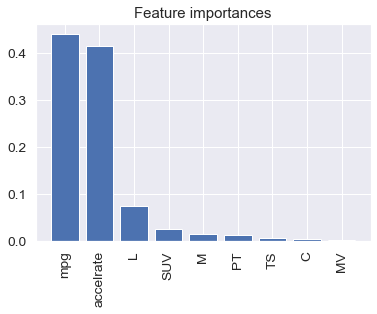

In [85]:
feat_importances = forest_reg.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feat_importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
plt.show()

In [61]:
y_pred = forest_reg.predict(X_test)

forest_mse = mean_squared_error(y_pred, y_test)

forest_rmse = np.sqrt(forest_mse)

print('Random Forest RMSE: %.4f' % forest_rmse)

Random Forest RMSE: 10192.7995


In [62]:
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))


Gradient Boosting R squared": 0.8282


/Users/jasonsitu/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
y_pred = model.predict(X_test)

model_mse = mean_squared_error(y_pred, y_test)

model_rmse = np.sqrt(model_mse)

print('Gradient Boosting RMSE: %.4f' % model_rmse)

Gradient Boosting RMSE: 11336.2305


## Conclusion:

After testing multiple models and and parameters, we can see that random forest had the best fit with an R squared of .86 and RMSE of 10192, which isn't bad since the mean MSRP is 39318. Of course if we had more variables and more data, our models can improve overtime but it isn't bad given we had less than 200 rows of data. I am not surprised that the random forest model performed better since it is a model that can handle non linear and complex variables better than the linear regression model. We can also see that in the feature importance chart that mge and acclerate has the most importances to the model which was the same when using regression based model. 

I provided alot of my reasoning and thought process below when answering the exercise questions. 


## Exercise

Using R, Python, or another statistical package, perform a regression on this data to model MSRP (price) as a function of other inputs from the data, and then answer these questions. Please share your code and full analysis. 

Though not a requirement, consider using R Markdown or Jupyter Notebook to annotate your work. Another option would be to thoroughly comment in-file.

1. What does your model tell you about hybrid vehicle pricing? What insights can you draw?
- After building a correlation matrix and a regression model, we see that the acclerate, mpg and car class variables has a significant impact into the MSRP (Price). 

2. Did you use a standard linear regression model or a different type, and if so, why?
- I used linear regression, random forest and Gradient boosting as my model of choice.
- Linear regression models are commonly used for regression analysis due to their simplicity and interpretability. Linear regression models are easy to understand and implement, and can provide insights into the relationship between the variables. However, they may not capture complex non-linear relationships between variables and may suffer from issues such as multicollinearity, heteroscedasticity, and outliers. Random forest models and gradient boosting models are two popular ensemble methods used for regression analysis. Random forest models and gradient boosting models are particularly useful when there are non-linear relationships between variables or when interactions between variables are important. They are generally more robust than linear regression models and can handle missing data and outliers better. However, they can be more complex and difficult to interpret than linear regression models. Linear regression models may be sufficient for simple problems with few variables and a linear relationship, while random forest models and gradient boosting models may be more appropriate for complex problems with many variables and non-linear relationships. It is often a good idea to try multiple models and compare their performance to determine which one is the best fit for the data.

3. Which variables did you choose to include and exclude from your model and why? Did you define any of your own explanatory variables from the data?
- For this project, I decided to include acclerate, mpg, and carclass variables and excluded the rest.
- The reason for excluding each variable is as listed below
    - excluding car id is because it serve no purpose than indexing each row. 
    - car class id is a categorical variable and is 1:1 with car class, thus removing one of the dupes
    - Year and Vehicle had potential but I saw no statistical signifcance in their constant coeffeicent, thus did not add them into the model. This doesn't mean these variable doesn't add value to the price of a hybrid car.
    - I made the trade off call for a more simpler model for easier interpretation, than a more complex model with harder interpretation given the limited data source and information I have.

4. Which variables have significant explanatory power on hybrid vehicle pricing? Which do not? Is this surprising?
- I choice to keep all the variables that had significant power on hybrid vehicle pricing, which in this case was acclerate, mpg and carclass. I was not surprised by the outcome because after plotting a scatter plot of the relationship between varies dependent variable to the independent variable(MSRP), we can see the obvious relationship between varies X values to the Y value.
- After testing different set of variables, I concluded that vehicle and year had no statistical significance. I wasn't surprise at all since these didn't have a linear relationship to MSRP.

5. How confident are you in your model's fit? Why?
- I am confident in my model's fit because I only allocated statistical signnficance variables into the model. Based on testing my models fit and their RMSE (root mean squared error). I am confident in the accuracy of these models. I would be less confident if we included more variables that didn't have any linear relationship or non linear relationship to the model because that could potential cause more noise and errors within the models unless we tranform the dataset even more or utilize more complex models. 
